In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [5]:
# concat all features
df_train = pd.read_csv('data/train_data_cleaned.csv', sep=',')
df_test = pd.read_csv('data/test_data_cleaned.csv', sep=',')

schools01 = pd.read_csv('data/primary_school_01.csv', sep=',')
schools01_test = pd.read_csv('data/primary_school_01_test.csv', sep=',')
schools02 = pd.read_csv('data/primary_school_02.csv', sep=',')
schools02_test = pd.read_csv('data/primary_school_02_test.csv', sep=',')
schools03 = pd.read_csv('data/primary_school_03.csv', sep=',')
schools03_test = pd.read_csv('data/primary_school_03_test.csv', sep=',')

secschool01 = pd.read_csv('data/sec_school_01.csv', sep=',')
secschool01_test = pd.read_csv('data/sec_school_01_test.csv', sep=',')
secschool02 = pd.read_csv('data/sec_school_02.csv', sep=',')
secschool02_test = pd.read_csv('data/sec_school_02_test.csv', sep=',')
secschool03 = pd.read_csv('data/sec_school_03.csv', sep=',')
secschool03_test = pd.read_csv('data/sec_school_03_test.csv', sep=',')

shopping01 = pd.read_csv('data/shopping_01.csv', sep=',')
shopping01_test = pd.read_csv('data/shopping_01_test.csv', sep=',')
shopping02 = pd.read_csv('data/shopping_02.csv', sep=',')
shopping02_test = pd.read_csv('data/shopping_02_test.csv', sep=',')
shopping03 = pd.read_csv('data/shopping_03.csv', sep=',')
shopping03_test = pd.read_csv('data/shopping_03_test.csv', sep=',')

hawker_01 = pd.read_csv('data/hawker_01.csv', sep=',')
hawker_01_test = pd.read_csv('data/hawker_01_test.csv', sep=',')
hawker_02 = pd.read_csv('data/hawker_02.csv', sep=',')
hawker_02_test = pd.read_csv('data/hawker_02_test.csv', sep=',')
hawker_03 = pd.read_csv('data/hawker_03.csv', sep=',')
hawker_03_test = pd.read_csv('data/hawker_03_test.csv', sep=',')

cc01 = pd.read_csv('data/cc_01.csv', sep=',')
cc01_test = pd.read_csv('data/cc_01_test.csv', sep=',')
cc02 = pd.read_csv('data/cc_02.csv', sep=',')
cc02_test = pd.read_csv('data/cc_02_test.csv', sep=',')
cc03 = pd.read_csv('data/cc_03.csv', sep=',')
cc03_test = pd.read_csv('data/cc_03_test.csv', sep=',')

train_01 = pd.read_csv('data/train_01.csv', sep=',')
train_01_test = pd.read_csv('data/train_01_test.csv', sep=',')
train_02 = pd.read_csv('data/train_02.csv', sep=',')
train_02_test = pd.read_csv('data/train_02_test.csv', sep=',')
train_03 = pd.read_csv('data/train_03.csv', sep=',')
train_03_test = pd.read_csv('data/train_03_test.csv', sep=',')

train_data = pd.concat([df_train[df_train.columns.values[:-1]], 
                        schools01, schools02, schools03, 
                        secschool01, secschool02, secschool03,
                        shopping01, shopping02, shopping03,
                        hawker_01, hawker_02, hawker_03,
                        cc01, cc02, cc03,
                        train_01, train_02, train_03,
                        df_train['price']], axis=1)
test_data = pd.concat([df_test, schools01_test, schools02_test, schools03_test, 
                       secschool01_test, secschool02_test, secschool03_test, 
                       shopping01_test, shopping02_test, shopping03_test, 
                       hawker_01_test, hawker_02_test, hawker_03_test,
                       cc01_test, cc02_test, cc03_test, train_01_test, train_02_test, train_03_test], axis=1)

In [6]:
train_len = train_data.shape[0]
train_data.shape, test_data.shape

((25714, 34), (7500, 33))

In [7]:
train_labels = train_data.price
train_data = train_data.drop(columns = ['price'])
all_data = pd.concat([train_data, test_data]).reset_index(drop=True)
all_data = all_data.drop(columns=['name','street','lat','lng'])
all_data.shape

(33214, 29)

In [8]:
# label encoder
le_cols = ['planning_area','subszone','built_year']
for c in le_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
all_data = pd.get_dummies(all_data, dummy_na=False)
print(all_data.shape)

(33214, 36)


In [14]:
# split train and test data
all_data_ensemble = all_data.copy()
all_data_ensemble['bed_bath_ratio'] = all_data_ensemble['bedrooms']/all_data_ensemble['bathrooms']
train_data_ensemble = all_data_ensemble[:train_len]
test_data_ensemble = all_data_ensemble[train_len:]
train_data_ensemble.shape, test_data_ensemble.shape

((25714, 37), (7500, 37))

In [15]:
# fit the model
m = RandomForestRegressor(n_jobs=-1, n_estimators=1050, max_depth=20, min_samples_leaf=1, min_samples_split=2, max_features=0.5, oob_score=True)
m.fit(train_data_ensemble, train_labels)
m.oob_score_

0.9753140176257796

                           cols       imp
8                     area_size  0.630395
1                     bathrooms  0.117225
0                      bedrooms  0.044259
16                shopping_0to2  0.033558
15                shopping_0to1  0.021878
4                      subszone  0.017209
17                shopping_0to3  0.014679
36               bed_bath_ratio  0.014012
7                   no_of_units  0.009710
26                   train_0to3  0.009276
2                      district  0.009101
6                    built_year  0.008492
9           primary_school_0to1  0.008100
31        region_central region  0.007644
20                  hawker_0to3  0.006693
25                   train_0to2  0.006639
14              sec_school_0to3  0.005988
19                  hawker_0to2  0.005880
11          primary_school_0to3  0.005176
10          primary_school_0to2  0.004494
13              sec_school_0to2  0.003435
18                  hawker_0to1  0.003105
24                   train_0to1  0

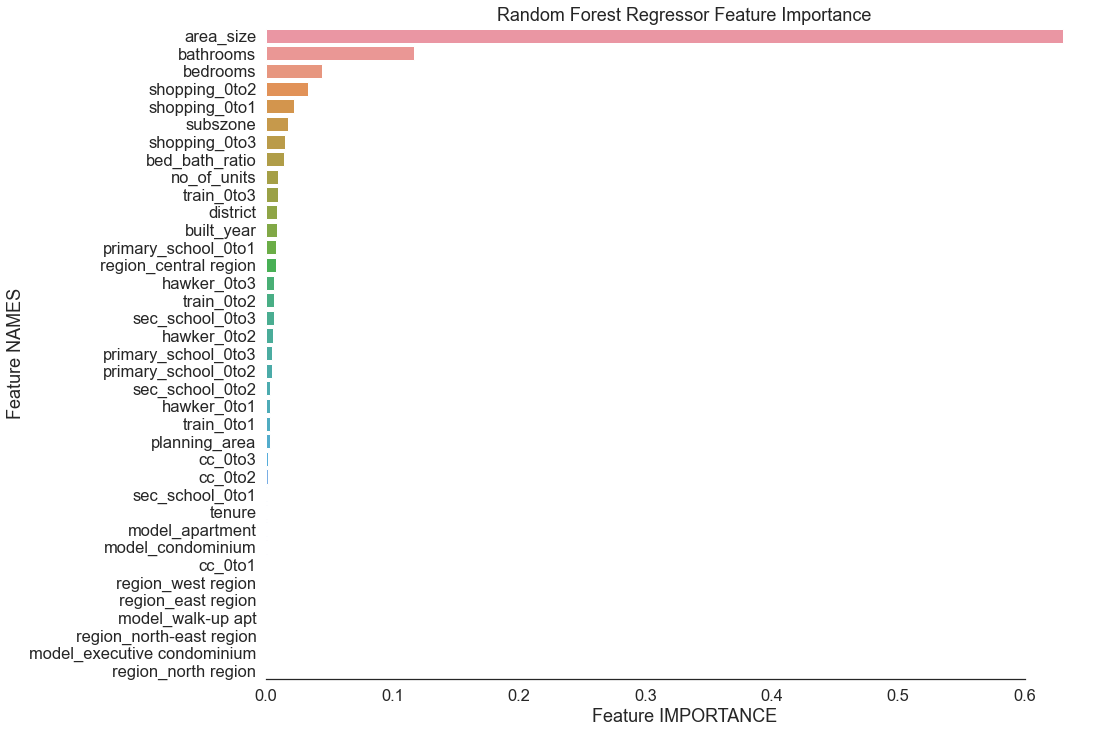

In [16]:
# feature importance
def plot_feature_importance(m, df):
    sns.set(font_scale = 1.5)
    sns.set_style("white")
    print(pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False))
    #Create arrays from feature importance and feature names
    feature_importance = np.array(m.feature_importances_)
    feature_names = np.array(df.columns)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(15,12))
    #Plot Searborn bar chart
    ax = sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    sns.despine(trim=True, top=True, right=True, left=True, bottom=False)
    plt.title('Random Forest Regressor Feature Importance')
    plt.xlabel('Feature IMPORTANCE')
    plt.ylabel('Feature NAMES')
    plt.savefig('images/feature_importance_rf.png', dpi=600, bbox_inches='tight')
    plt.show()
    
plot_feature_importance(m, train_data_ensemble)